#####予測モデルの訓練の流れ
1. データセットを訓練データとテストデータに分割
2. 説明変数の標準化
3. 予測モデルの指定
4. 損失関数の指定
5. 訓練データと損失関数を用いたモデルの訓練
6. テストデータを用いたモデルの評価
---
#####Flow of training a predictive model
1. split the dataset into training and test data
2. standardize explanatory variables
3. specify a predictive model
4. specify a loss function
5. train the model using the training data and the loss function
6. evaluate the model using the test data

目的
* タイタニック乗客の生存有無を**決定木**で予測するモデルを作成
* 1:生存か0:非生存かを予測する**分類問題**
---
Objective
* Create a model to predict whether Titanic passengers will survive or not with **a decision tree**
* **Classification problem** to predict 1: survived or 0: not survived

データセット/Dataset (train.csv): https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv?resource=download
* train.csv: 顧客情報と生存の有無が記載されています。
* train.csv: It contains customer information and whether the customer is still alive or not.

データ項目/Data item
* PassengerId: 乗客識別連番ID/Passenger Identification Sequential Number ID
* Survived: 生存の有無（0=死亡, 1=生存）/Survival (0=dead, 1=alive)
* Pclass: チケットクラス（1=上層クラス, 2=一般クラス, 3=下層クラス）/Ticket Class (1=Upper Class, 2=General Class, 3=Lower Class)
* Name: 乗客の名前/Passenger's Name
* Sex: 性別（male=男性, female＝女性）/Gender (male=male, female=female)
* Age: 年齢/Age
* SibSp: タイタニックに同乗している兄弟配偶者の数/Number of sibling spouses on board the Titanic.
* Parch: タイタニックに同乗している親子供の数/Number of parents and children boarding with the Titanic
* Ticket: チケット番号/Ticket Number
* Fare: 料金/Fee
* Cabin: 客室番号/Room Number
* Embarked: 出港地（C = Cherbourg, Q = Queenstown, S = Southampton）/Departure point (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6data/train.csv')

* データ形式の変換と不要なデータの削除
* Convert data format and delete unnecessary data

pandas.Series.map: https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
* **map()**の活用例: 質的データを量的データに変換
* Example of **map()** usage: Converting qualitative data to quantitative data

pandas.get_dummies: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

sklearn.preprocessing.OneHotEncoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

* **OneHot（ワンホット）エンコーディング**とは複数種類の性質を持つような、**カテゴリのデータを0か1かで表現する方法**です。
* OneHotエンコーディングをする方法は2つあります。 一つはpandasの**pd.get_dummies**を使う方法。 もう一つはscikit-learnにある**OneHotEncoder**を使う方法です。
---
* **OneHot encoding** is **a method of representing categorical data as 0 or 1**, such that it has multiple properties.
* There are two ways to do one-hot encoding. One is to use **pd.get_dummies** in pandas. The other is to use **OneHotEncoder** in scikit-learn.

pandas.DataFrame.drop: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
* drop: pandas.DataFrameの行・列を指定して削除する。
* drop: Delete a row or column of a pandas.DataFrame by specifying the row or column.

axis = 0, axis=1: https://qiita.com/Phoeboooo/items/b464b7df3c64a33caf94

In [ ]:
# データの変換/Convert data
##maleを0に、femaleを1に変換/Convert "male" to 0 and "female" to 1
train["Sex"] = train["Sex"].map({"male":0,"female":1})

# EmbarkedのOne-Hotエンコーディング/Embarked's One-Hot encoding
train = pd.get_dummies(train, columns=['Embarked'])

## 不要な列の削除/Delete unnecessary columns
train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

* 欠損データの確認と対処
* Check and address missing data

pandas.isnull: https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
* 配列のようなオブジェクトの欠損値を検出する。
* Detect missing values for an array-like object.

pandas.DataFrame.dropna: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
* pandas.DataFrame, Seriesの欠損値NaNを削除するにはdropna()メソッドを使います。
* Use the dropna() method to delete missing values NaN in pandas.DataFrame, Series.

In [ ]:
# NaN の存在確認 と 除去/Confirmation and removal of NaN
print(train.isnull().sum())

train2 = train.dropna()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 説明変数Xと目的変数yの設定/Set explanatory variable X and target variable y
X_train = train2.drop(['Survived'], axis=1)
y_train = train2['Survived']

# 1. データセットを訓練データとテストデータに分割/Split dataset into training and test data
# X_trainとY_trainをtrainとvalidに分割/Split X_train and Y_train into train and valid
train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

* 訓練用データを2つに分けるのをホールドアウト法、3つ以上に分けるのを交差検証法と言います。
* Splitting the training data into two is called the holdout method, and splitting the data into three or more is called the cross-validation method.

sklearn.tree.DecisionTreeClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# 3. 予測モデルの指定 4. 損失関数の指定 5. 訓練データと損失関数を用いたモデルの訓練
# 3. specify specify the predictive model 4. specify the loss function 5. train the model using the training data and the loss function

import sklearn.tree as tree

# 分類木だからClassifier/Classifier because it is a classification tree.
clf = tree.DecisionTreeClassifier(max_depth=4)

# データを用いて学習/Training with data
model = clf.fit(train_x, train_y)

# 6. モデルの評価/Evaluate the model
# 検証データを用いて予測およびモデルの評価/Predict and evaluate models using validation data
predicted = model.predict(valid_x)
print(accuracy_score(predicted,valid_y))

0.7902097902097902


* 結果は0.7902097902097902になりました。約8割程度の評価です。これは訓練用データに8割程度の正答率で合致しているという解釈になります。
* The result is now 0.7902097902097902. This is an evaluation of about 80%. This is interpreted as about an 80% correct match to the training data.

* 混同行列による予測結果の視覚化
* Visualize prediction results using a confusion matrix

sklearn.metrics.confusion_matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* 分類の精度を評価するための混同行列を計算する。
* 混同行列とは、予測とその予想の正解かどうかの組み分けを表にまとめたものです。
---
* Compute confusion matrix to evaluate the accuracy of a classification.
* A confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes.
* https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5

In [ ]:
from sklearn.metrics import confusion_matrix

#混同行列の作成/Create a confusion matrix
cmatrix = confusion_matrix(valid_y,predicted)

#pandasで表の形に/Table form in pandas
df = pd.DataFrame(cmatrix,index=["actual_died","actual_survived"],columns=["pred_died","pred_survived"])

print(df)

                 pred_died  pred_survived
actual_died             71              8
actual_survived         22             42


sklearn.tree.plot_tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
* 木構造の図示
* Illustration of tree structure

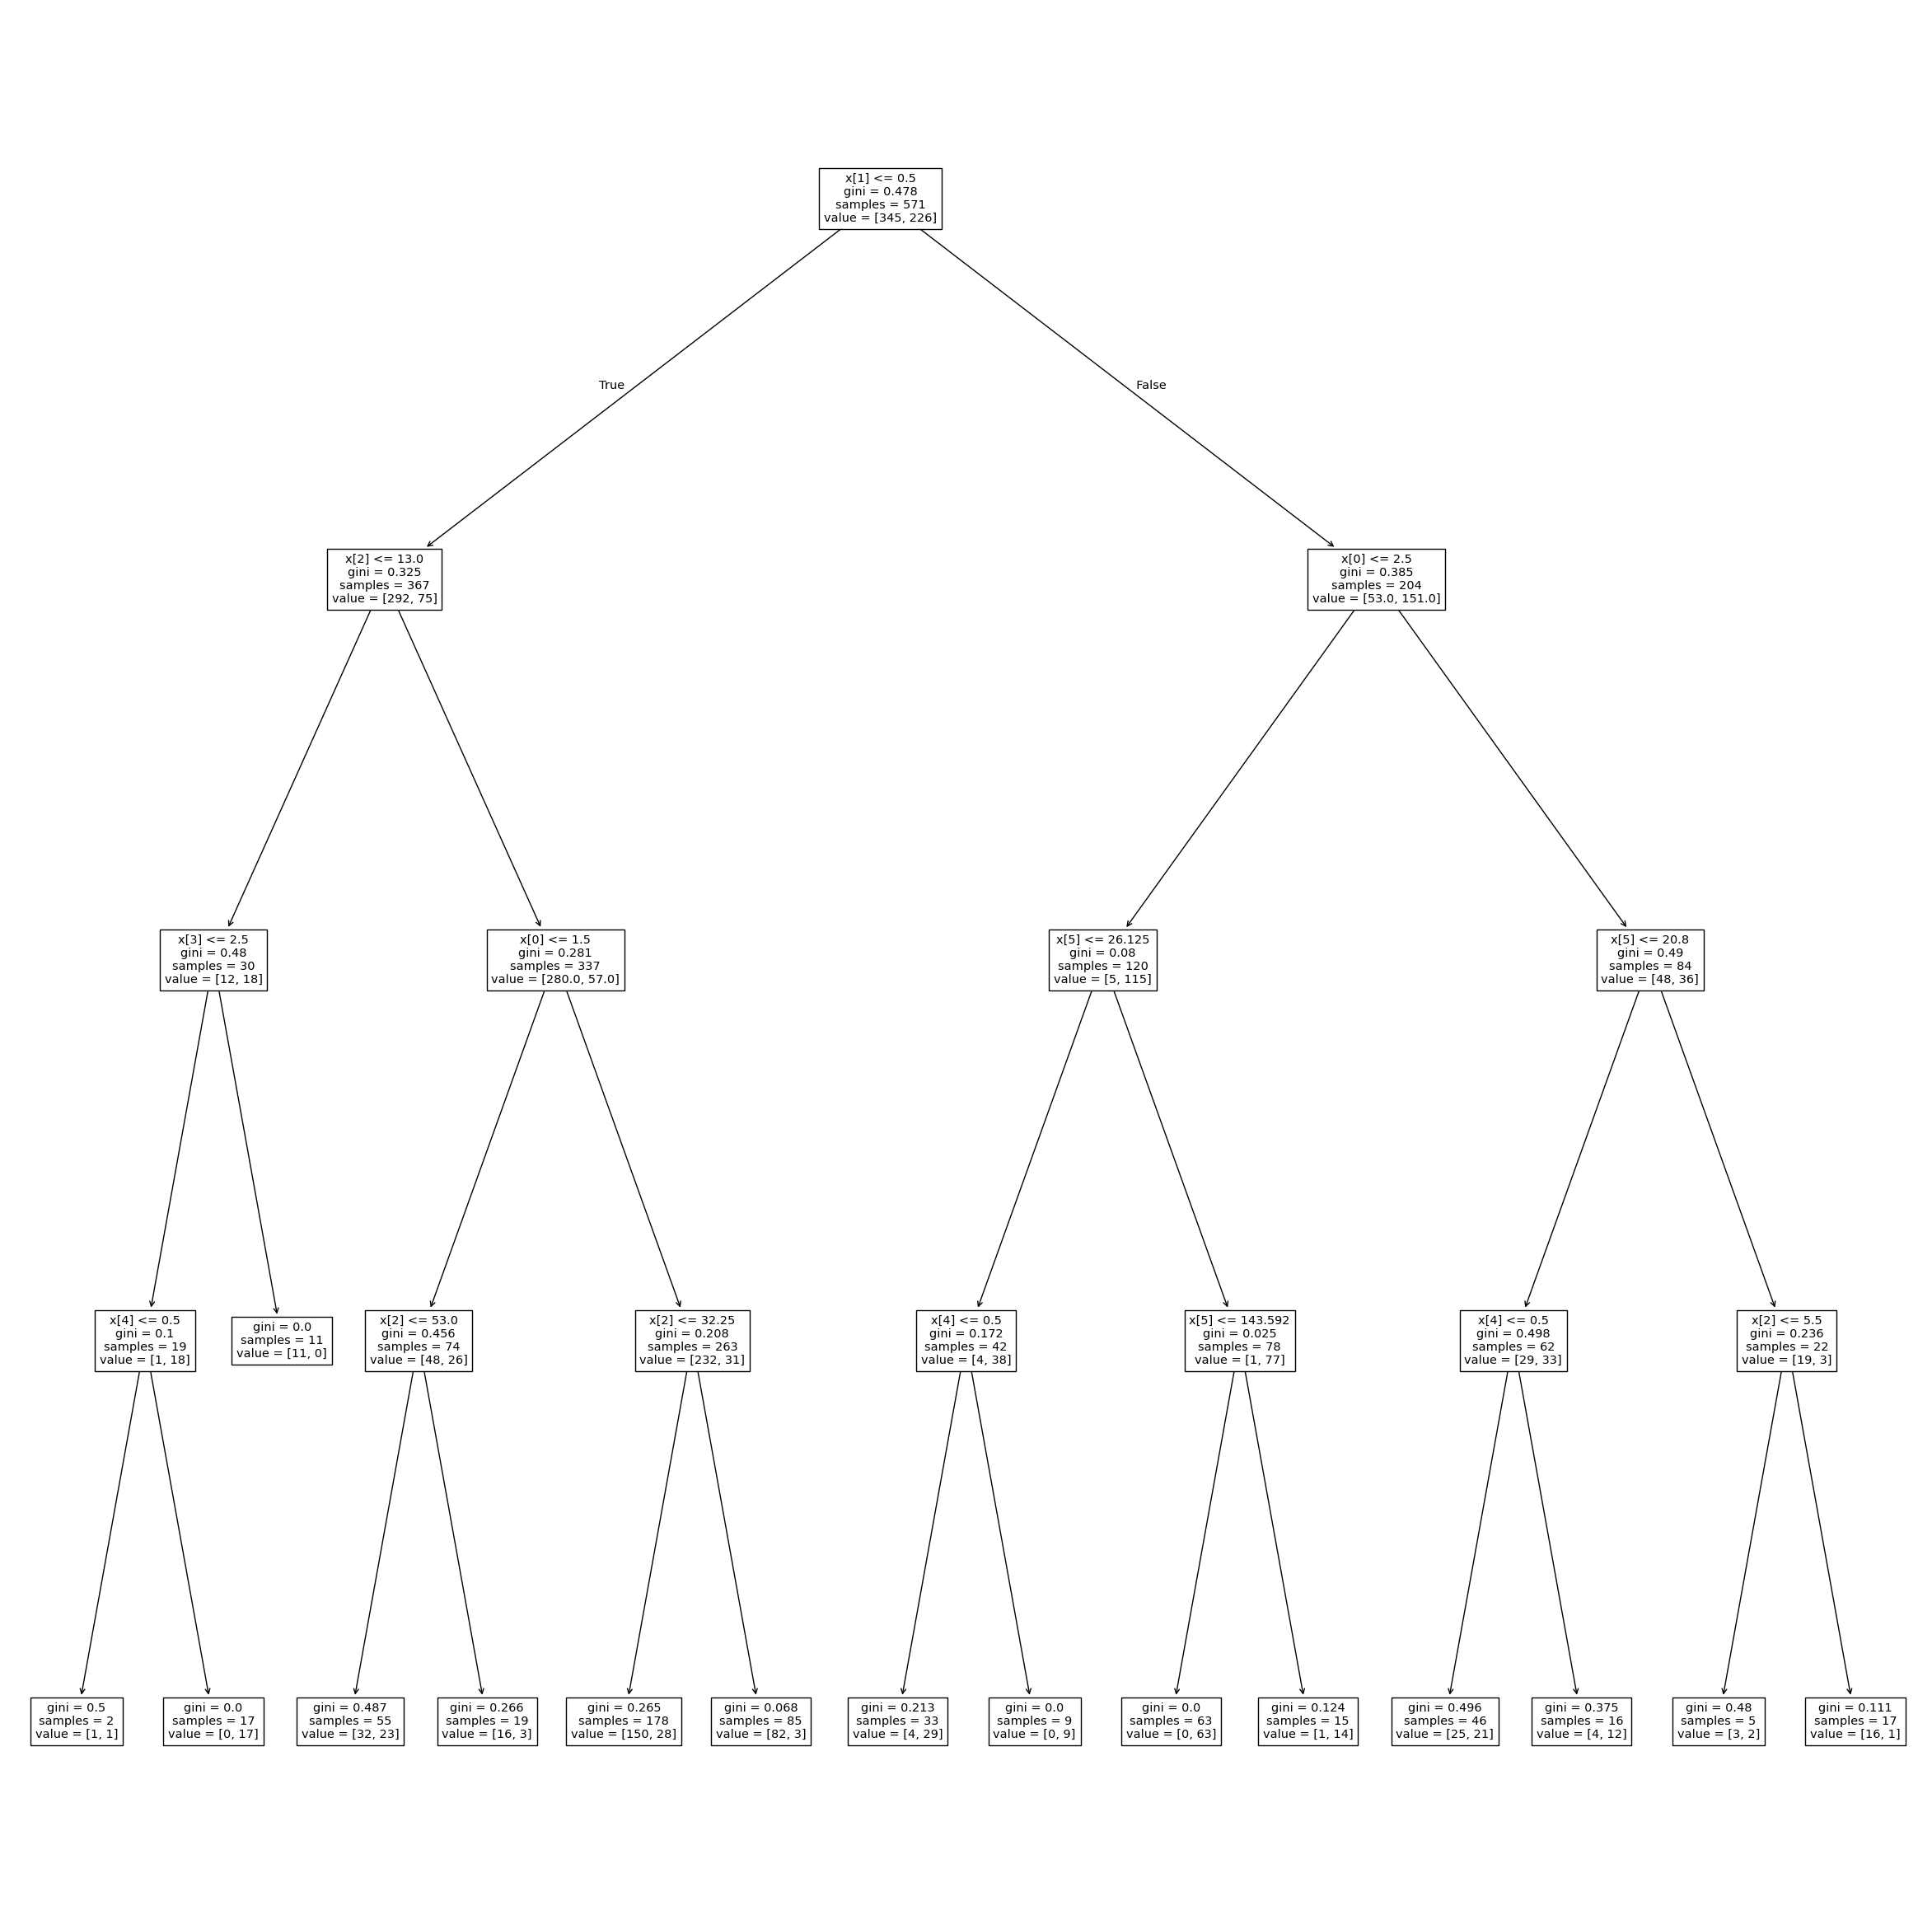

In [ ]:
# 図示/illustration
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 30))
tree.plot_tree(model, ax=ax)
plt.show()

* 木構造の解析：変数の重要性
 * 解析の結果どの変数が生存に大きな影響を及ぼしたか
 * ジニ不純度： クラス分けをする時にどれだけ綺麗に分けることができるか
---
* Tree structure analysis: the importance of variables
 * Which variables had a significant impact on survival as a result of the analysis
 * Gini impurity: How cleanly can we separate them when classifying them?

Feature importances with a forest of trees: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
* feature_importances_ とは sklearn.ensemble.RandomForestClassifier、 sklearn.ensemble.RandomForestRegressor (など)で特徴量の重要度を出力するメソッドです。
* feature_importances_ is a method that outputs the importance of features in sklearn.ensemble.RandomForestClassifier, sklearn.ensemble.RandomForestRegressor (etc).

matplotlib.pyplot.subplots: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
* subplotsで生成したAxesオブジェクトに対してbarメソッドを実行することで、棒グラフを表示することができる。 xが各棒グラフの横軸の位置、yが棒グラフの高さになる。
* By executing the bar method on the Axes object generated by subplots, bar graphs can be displayed. x is the position of the horizontal axis of each bar graph, and y is the height of the bar graph.
* ax.bar: https://www.python-beginners.com/entry/20190721/1563680016

{'Pclass': np.float64(0.2342134014862189), 'Sex': np.float64(0.5181938135344568), 'Age': np.float64(0.1015399550966152), 'SibSp': np.float64(0.086065779499555), 'Parch': np.float64(0.021661621787592154), 'Fare': np.float64(0.03832542859556199), 'Embarked_C': np.float64(0.0), 'Embarked_Q': np.float64(0.0), 'Embarked_S': np.float64(0.0)}


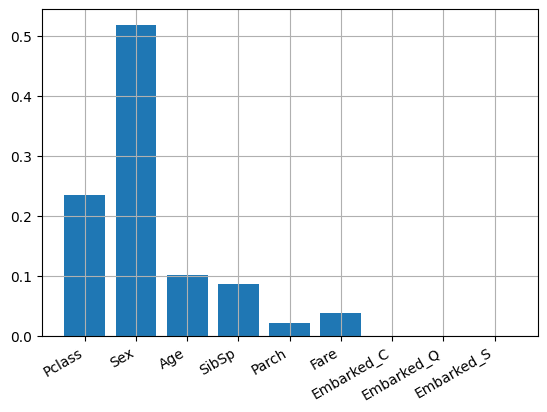

In [ ]:
# 重要度を表示/Indicate the level of importance
print(dict(zip(train_x.columns, model.feature_importances_)))

# bar plot
fig, ax = plt.subplots()
plt.grid()
ax.bar(train_x.columns,model.feature_importances_)
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
plt.show()

* ↑1に性別、2に乗客の等位、3に年齢となっています
* ↑1 for gender, 2 for passenger rank, and 3 for age.